# ex-02 Explain 100-year Weather Events with Python

In [1]:
# Set some parameters to apply to all plots. These can be overridden
import matplotlib
# Plot size to 12" x 7"
matplotlib.rc('figure', figsize = (11, 6))
# Font size to 11
matplotlib.rc('font', size = 9)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

In recent years, I have been doing quite a few projects, where some extreme events were analyzed such as floods, river discharge flows, wind storms, or significant wave heights, etc. Can you guess what the most interesting part is? It is neither data collecting and cleaning nor selecting the optimal extreme value distribution function or writing the technical memo. In fact, the most interesting part for me is to explain the final analysis results to the clients. I say this explanation is very interesting. On the one hand, it means that you have to explain the meaning of your analysis results to the customer. On the other hand, it sometimes means that you have to explain it to yourself first.

Let's take a ***100-year flood*** as an example to have a look at some interesting questions our clients asked before. Some problems involve statistics, and are hard to describe in plain language. I will apply python to carry out some simple analysis. More details could refer to the below references.

## Q1: What does the ***100-year*** mean?

The first question popped up always is what the ***100-year*** does mean. The 100-year means a [return period](https://en.wikipedia.org/wiki/Return_period), or average recurrence interval (ARI) or repeat interval, which is an average time or an estimated average time (here 100 years) between events such as earthquakes, floods or river discharge flows to occur (here we take the flood as exmaple). 

100-year flood is often called one-in-100-years' flood. Now more and more people think that the concept of 100-year flood may cause a [misunderstanding](https://www.abc.net.au/news/2021-03-28/one-in-100-years-flood-talk-misleading/100030144), in which a 100-year flood is likely to occur only once in a 100-year period. As many as possible, we would avoid using the phrase “100-year flood” because of this common misunderstanding. However, the term is so widespread in social media now, it is hard to change. Therefore, we often clearly explain to our customers that a 100-year flood is a flood event that has a 1 in 100 chance (1% probability) of being equaled or exceeded *in any given year*. 

In another word, this does not mean that once a flood with such a return period occurred, it will not occur again in the next 99 years - instead, it means that, in any given year, there is a 1% chance that it will happen, regardless of when the last similar event was.

## Q2: A 100-year flood  only has a 1% occurring probability. Do I really need to concern about it?

While a 100-year flood only has a 1% chance of occurring in a given year, the chance is much higher when looking at longer time periods. 

Following the definition of [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution), we can find that we can apply it to decribe a 100-year flood event. 
>In probability theory and statistics, the Bernoulli distribution, named after the Swiss mathematician Jacob Bernoulli, is the discrete probability distribution of a random variable which takes the value 1 with probability p and the value 0 with probability q=1-p. Less formally, it can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes–no question. Such questions lead to outcomes that are boolean-valued: a single bit whose value is success/yes/true/one with probability p and failure/no/false/zero with probability q. 

For a 100-year flood, its return period is T = 100 years. And the occurring probability p (yes) is 0.01 (i.e., 1/T), while the probability without a 100-year flood (no) is 1 - p or 0.99. Thus, the probability Pe that one or more floods occurring during any period will exceed a given flood threshold can be expressed as

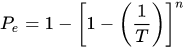

where T is the threshold return period (i.e., 100-yr here), and n is the number of years in the period. Keep in mind that Pe could also be understood as the probability of at least one 100-year flood occurrring in any period.

Now let's calculate the probabilites of Pe for the years between 1 and 100 years with python and visualize them in a chart.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
T = 100                               # return period
p = 1/T                               # probability of a 100-year event
nyear = np.arange(1, 101)             # years between 1 - 100 years
probs = (1.0 - (1 - p)**nyear) * 100  # convert Pe to %

probs

(1.0 - (1-p)**70) * 100

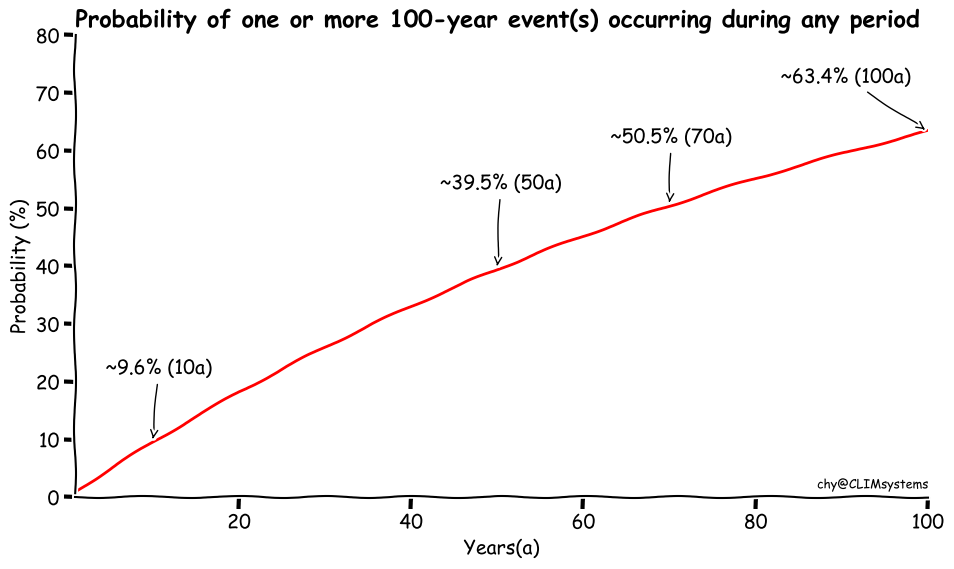

In [4]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.set_xlim(1, 100)
    ax.set_ylim(0, 80)
    ax.plot(nyear, probs, 'r')
    ax.set_title('Probability of one or more 100-year event(s) occurring during any period',
                 loc='left', 
                 fontsize=17, fontweight='bold')
    ax.set_ylabel("Probability (%)")
    ax.set_xlabel("Years(a)")


    ax.annotate(f'~{np.around(probs[9],1)}% (10a)',
                xy=(10, probs[9]), xycoords='data',
                xytext=(0.16, 0.3), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="->"),
                horizontalalignment='right', verticalalignment='top')    
    
    ax.annotate(f'~{np.around(probs[49],1)}% (50a)',
                xy=(50, probs[49]), xycoords='data',
                xytext=(0.57, 0.7), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="->"),
                horizontalalignment='right', verticalalignment='top')
    
    ax.annotate(f'~{np.around(probs[69],1)}% (70a)',
                xy=(70, probs[69]), xycoords='data',
                xytext=(0.77, 0.8), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="->"),
                horizontalalignment='right', verticalalignment='top')

    ax.annotate(f'~{np.around(probs[-1],1)}% (100a)',
                xy=(100, probs[-1]), xycoords='data',
                xytext=(0.98, 0.93), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="->"),
                horizontalalignment='right', verticalalignment='top')
    
    _ = ax.text(0.87, 0.02, r"chy@CLIMsystems", fontsize=9, transform=ax.transAxes)
    
    plt.savefig('img/explain_100_year_events.png', dpi=150)
    
!mogrify -trim -matte -bordercolor White -border 15 img/explain_100_year_events.png

From the above chart, we can find:
- the probability of a 100-year flood in ten years is about 9.6%, 
- the probability of a 100-year flood in 50 years is about 39.5%, 
- the probability of a 100-year flood in 70 years is about 50.5%, 
- The probability of a 100-year flood is about 63.4%.

While a 100-year flood with a 1% probability might sound pretty rare and unlikely, the probability will get much higher when looking at longer time periods. For example, if you have a house designed to withstand a 100-year flood, there’s a roughly 50.5% chance the house would be flooded at some point over the course of 70 years! Not the best odds.

On the other hand, if a person could live up to 100 years and stays at a place, he still has a 36.6% change without encountering any 100-year flood in his life.  

## Q3: What is the probability of getting exactly N 100-year floods Over a period?

We can apply the [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution) to answer this kind of question.

> In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p). A single success/failure experiment is also called a Bernoulli trial or Bernoulli experiment, and a sequence of outcomes is called a Bernoulli process; for a single trial, i.e., n = 1, the binomial distribution is a Bernoulli distribution. The binomial distribution is the basis for the popular binomial test of statistical significance.

> In general, if the random variable X follows the binomial distribution with parameters n ∈ N and p ∈ [0,1], we write X ~ B(n, p). The probability of getting exactly k successes in n independent Bernoulli trials is given by the probability mass function:

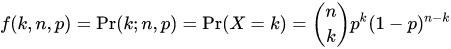


It is a little difficult to calculate binomial probabilities. Luckily, the python package of  *scipy* provides us a ***binom function*** to calculate this kind of probabilities.

>binom function takes inputs as k, n and p and given as binom.pmf(k,n,p) , where pmf is Probability mass function.

Let's first calcualte the probability of exactly two 100-year floods in 10 years:

In [5]:
from scipy.stats import binom

#calculate binomial probability
result = binom.pmf(k=2, n=10, p=0.01)

#Print the probability
print(f"Probability of exactly two 100-year floods in 10 years is {np.round(result*100, 3)}%")

Probability of exactly two 100-year floods in 10 years is 0.415%


In [6]:
#calculate binomial probability
result = binom.pmf(k=3, n=10, p=0.01)

#Print the probability
print(f"Probability of exactly three 100-year floods in 10 years is {np.round(result*100, 3)}%")

Probability of exactly three 100-year floods in 10 years is 0.011%


The probability of encountering two 100-year floods in 10 years is about 0.415%, which is quite low. You can also calculate the probability of three 100-years floods exactly occurring in 10 years. It is 0.011%, which is almost impossible to happy.

We can also list the probabilities of [1~9] 100-year floods exactly occurring over a period of 100 years.

In [9]:
sum = 0.0
for it in np.arange(1, 10):
    tp = binom.pmf(k=it, n=100, p=0.01) *100
    print(f"Times: {it}, The prob is: {np.round(tp, 3)}%")
    sum += tp
    
print(f"\nThe total probability is {np.round(sum, 3)}%")

Times: 1, The prob is: 36.973%
Times: 2, The prob is: 18.486%
Times: 3, The prob is: 6.1%
Times: 4, The prob is: 1.494%
Times: 5, The prob is: 0.29%
Times: 6, The prob is: 0.046%
Times: 7, The prob is: 0.006%
Times: 8, The prob is: 0.001%
Times: 9, The prob is: 0.0%

The total probability is 63.397%


## References

ASCE, Task Committee on Hydrology Handbook of Management Group D of (1996). Hydrology Handbook | Books. doi:10.1061/9780784401385. ISBN 978-0-7844-0138-5.

Holmes, R.R., Jr., and Dinicola, K. (2010) 100-Year flood–it's all about chance U.S. Geological Survey General Information Product 106

Peres, D. J.; Cancelliere, A. (2016-10-01). "Estimating return period of landslide triggering by Monte Carlo simulation". Journal of Hydrology. Flash floods, hydro-geomorphic response and risk management. 541: 256–271. doi:10.1016/j.jhydrol.2016.03.036

Viessman, Warren (1977). Introduction to Hydrology. Harper & Row, Publishers, Inc. p. 160. ISBN 0-7002-2497-1.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

https://en.wikipedia.org/wiki/Binomial_distribution

https://en.wikipedia.org/wiki/Return_period

https://en.wikipedia.org/wiki/100-year_flood

https://niwa.co.nz/natural-hazards/faq/what-is-a-return-period

https://theconversation.com/what-is-a-1-in-100-year-weather-event-and-why-do-they-keep-happening-so-often-1575

https://careerfoundry.com/en/blog/data-analytics/what-is-bernoulli-distribution/

https://www.abc.net.au/news/2021-03-28/one-in-100-years-flood-talk-misleading/100030144